In [1]:
from sqlalchemy import create_engine
#similar to api, created a config file to import the password the db. 
from sql_config import password


import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#snippet of code was created in class.
dbname = 'Employee_DB'
servername = 'localhost'
username = 'postgres'
port = 5432
conn_string = f'postgres://{username}:{password}@{servername}:{port}/{dbname}'
engine = create_engine(conn_string, echo= False)
conn = engine.connect()

In [3]:
#creating pandas DF using the connection to SQL
empl_df = pd.read_sql('Select * from salaries', conn)
empl_df.tail()

,emp_no,salary
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000
300023,499999,63707


In [31]:
# looking for the minimum to create bins
empl_df["salary"].min()

40000

In [32]:
#to help with Bins creation
empl_df["salary"].max()

129492

In [7]:
#binning the salary 
bins = [39999,59999,79999,99999,119999,130000]

groupname = ["40K-59K","60K-79K","80K-99K","100K-119K","120K-130K"]

In [8]:
empl_df["Salary Range"] = pd.cut(empl_df["salary"],bins, labels = groupname, include_lowest=True)
empl_df.tail()

,emp_no,salary,Salary Range
300019,499995,40000,40K-59K
300020,499996,58058,40K-59K
300021,499997,49597,40K-59K
300022,499998,40000,40K-59K
300023,499999,63707,60K-79K


In [9]:
salary_list = list(empl_df["salary"])

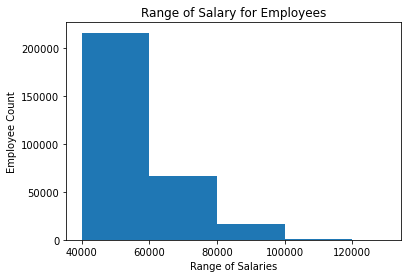

In [35]:
#using the bin to create histogram
plt.hist(salary_list, bins=bins)
plt.xlabel("Range of Salaries")
plt.ylabel("Employee Count")
plt.title("Range of Salary for Employees")
plt.savefig('../EmployeeSQL/histogram.png')

In [11]:
employees_db = pd.read_sql('Select * from employees', conn)
employees_db.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [12]:
titles_db = pd.read_sql('Select * from titles', conn)
titles_db

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [13]:
employees_merge = pd.merge(employees_db,titles_db, how='inner',left_on="emp_title_id", right_on="title_id")

In [14]:
employees_merge

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,s0001,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,s0001,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,s0001,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,m0001,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,m0001,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,m0001,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,m0001,Manager


In [15]:
complete_merge = pd.merge(employees_merge,empl_df, how="inner", on="emp_no")

In [16]:
complete_merge

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title,salary,Salary Range
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff,40000,40K-59K
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff,40000,40K-59K
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,s0001,Staff,56087,40K-59K
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,s0001,Staff,87084,80K-99K
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,s0001,Staff,63016,60K-79K
...,...,...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,m0001,Manager,72446,60K-79K
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,m0001,Manager,71148,60K-79K
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,m0001,Manager,60026,60K-79K
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,m0001,Manager,40000,40K-59K


In [18]:
complete_merge = complete_merge.groupby("title")
complete_merge["salary"].mean()

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

In [19]:
complete_merge["salary"].mean()

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

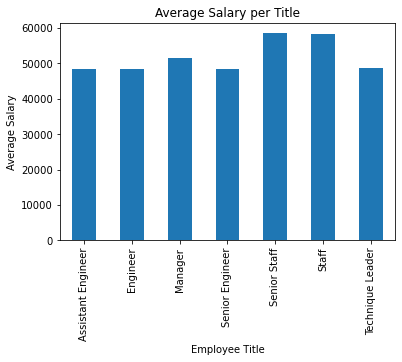

In [47]:
average = complete_merge["salary"].mean()
average.plot(kind='bar')
plt.xlabel("Employee Title")
plt.ylabel("Average Salary")
plt.title("Average Salary per Title")
plt.savefig('../EmployeeSQL/AverageSalary.png')